In [2]:
from qutip import *
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nqubit = 3

In [5]:
basis(3,0)

Quantum object: dims=[[3], [1]], shape=(3, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]]

In [3]:
init=[]

for n in range(nqubit):
    init.append(basis(2,0))
    
init=tensor(init)
init

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [4]:
Qeye=[]

for n in range(nqubit):
    Qeye.append(qeye(2))
    
Qeye=tensor(Qeye)
Qeye

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

In [5]:
Qeye=[]

for n in range(nqubit):
    Qeye.append(qeye(2))
    
Qeye=tensor(Qeye)

def Xop(m): 
    
    X=[]
    for n in range(nqubit):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Yop(m): 
    
    X=[]
    for n in range(nqubit):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Zop(m): 
    
    X=[]
    for n in range(nqubit):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Xop2(m): 
    
    X=[]
    for n in range(nqubit+1):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Yop2(m): 
    
    X=[]
    for n in range(nqubit+1):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Zop2(m): 
    
    X=[]
    for n in range(nqubit+1):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [6]:
Hamset=[]

V=1.0 

hx=1.0 

hz=0

for n in range(nqubit-1):
    
    Hamset.append( V/4* Zop(n)*Zop(n+1) )
    
for n in range(nqubit):
    
    Hamset.append(hx*Xop(n))
    
    Hamset.append(hz*Zop(n))
    
Hamil= 0* Zop(0)

for n in range(len(Hamset)):
    Hamil=Hamil+Hamset[n]

Hamil=Hamil

eigvals, eigvecs= Hamil.eigenstates()
print(Hamil)

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.5  1.   1.   0.   1.   0.   0.   0. ]
 [ 1.   0.   0.   1.   0.   1.   0.   0. ]
 [ 1.   0.  -0.5  1.   0.   0.   1.   0. ]
 [ 0.   1.   1.   0.   0.   0.   0.   1. ]
 [ 1.   0.   0.   0.   0.   1.   1.   0. ]
 [ 0.   1.   0.   0.   1.  -0.5  0.   1. ]
 [ 0.   0.   1.   0.   1.   0.   0.   1. ]
 [ 0.   0.   0.   1.   0.   1.   1.   0.5]]


In [7]:
ground_state_energy = np.min(eigvals)
print(f"The min eigen value is: {ground_state_energy}")

The min eigen value is: -3.0312481223319496


In [21]:
# Create the |0> state for a single qubit
ket_0 = basis(2, 0)

# Create the multi-qubit |0> state using the tensor product
multi_qubit_0 = ket_0
for _ in range(nqubit):
    multi_qubit_0 = tensor(multi_qubit_0, ket_0)

# Create the projection operator |0><0| for the n-qubit system
proj_0 = multi_qubit_0 * multi_qubit_0.dag()
multi_qubit_0

Quantum object: dims=[[2, 2, 2, 2], [1, 1, 1, 1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [22]:
def fil(a,x):
    return np.sqrt(a/np.pi)*np.exp(-a*x**2)

anc=(basis(2,0)+basis(2,1))/np.sqrt(2)

plus=(basis(2,0)+basis(2,1))/np.sqrt(2)

def noiseA(rho,n,p):
    
    #rho=(1.0-p[0]-p[1]-p[2])*rho+(1/3.0)*(p[0]*Xop2(n)*rho*Xop2(n)+p[1]*Yop2(n)*rho*Yop2(n)+p[2]*Zop2(n)*rho*Zop2(n))

    rho = (1.0-p) * rho + p * multi_qubit_0 * multi_qubit_0.dag()
    
    return rho

def noiseA2(rho,n,p):
    
    rho = (1.0-p) * rho + p * multi_qubit_0 * multi_qubit_0.dag()
    
    return rho

def Trotter(Ha,tt, N):
    Tro= Qeye 
    
    for n in range(len(Ha)):
        
        Tro= Tro*(-1j*Ha[n]*tt/N).expm()
        
    
    Res= Tro**N
    
    return Res
    
def controlH(Ham,tt): 
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*Ham*tt).expm())
    
    return contev


def controlHTro(Ha,tt, N): 
    
    Trop= Trotter(Ha, tt, N)
    
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), Trop)
    
    return contev

def noisyTrotone(tt, NN, rho, pp1, pp2):
    
    sta=rho
    
    for n in range(nqubit-1):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*V/4* Zop(n)*Zop(n+1)*tt/NN).expm())
    
        
        sta=contev* sta* contev.dag()
        
        sta= noiseA2(sta,0,pp1) 
        
        sta= noiseA2(sta,n,pp2) 
        
        sta= noiseA2(sta,n+1,pp2) 
        
    for n in range(nqubit):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*hx* Xop(n)*tt/NN).expm())
        
        sta=contev*sta* contev.dag()
        
    
    return sta

In [23]:
# main code 

delt = 0.5

Nran=20


Ntro=20

# Ancilla 
perr1=0.1

# System
perr2=0.1

Nshots=10*5

In [24]:
quint=init

quint2=tensor(ket2dm(anc), ket2dm(quint))

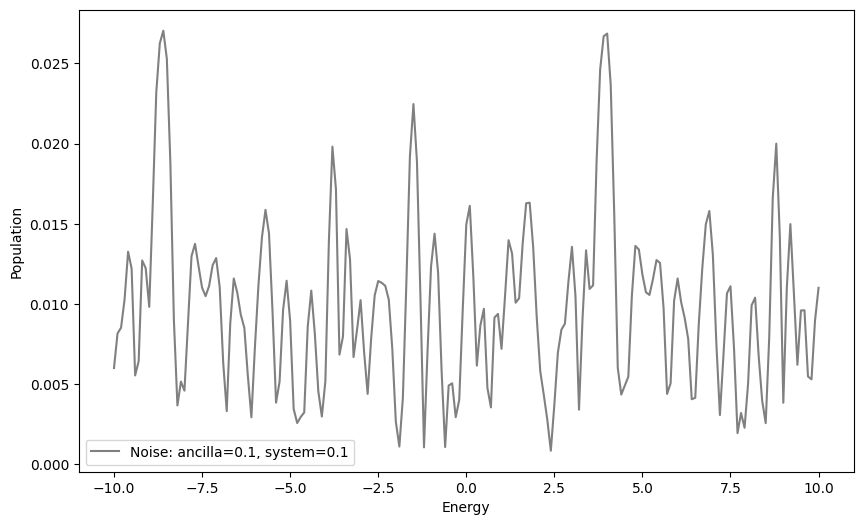

In [25]:
import random

# Add shot noise, with physical noise
delt = 0.5
Nran = 20
Ntro = 20

Nshots = 10 * 5
quint = init
quint2 = tensor(ket2dm(anc), ket2dm(quint))

EX, EY, Time = [], [], []

for n1 in range(-Nran, Nran + 1):
    t1 = delt * n1
    Time.append(t1)

    # noisyTrotone(tt, NN, rho, pp)
    state = quint2
    for kk in range(Ntro):
        state = noisyTrotone(t1, Ntro, state, perr1, perr2)

    expecx = (tensor(sigmax(), Qeye) * state).tr()
    expecy = (tensor(sigmay(), Qeye) * state).tr()
    varx = 1 - expecx ** 2
    vary = 1 - expecy ** 2

    randx = random.gauss(mu=expecx, sigma=np.sqrt(varx / Nshots))
    randy = random.gauss(mu=expecy, sigma=np.sqrt(vary / Nshots))

    EX.append(randx)
    EY.append(randy)

# Sweep energy
gamm = 0.001
delE = 0.1
Range = 100
Val, Energy = [], []

for k in range(-Range, Range + 1):
    Ee = delE * k
    Energy.append(Ee)

    val = 0
    for n in range(0, 2 * Nran + 1):
        t1 = delt * (n - Nran)
        val += fil(gamm, t1) * np.exp(1j * Ee * t1) * (EX[n] + 1j * EY[n]) * delt

    Val.append(abs(val))

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Energy, Val, "-", color="Gray", label=f'Noise: ancilla={perr1}, system={perr2}')
axes.legend(loc='best')

# Axis labels
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

# Show plot
plt.show()

In [26]:
def Cooling(
        gamm: float,
        delt: float,
        Nran: int,
        Ntro: int,
        
        shots: int,
        noise_anc: float,
        noise_sys: float,

):
    quint = init
    quint2 = tensor(ket2dm(anc), ket2dm(quint))

    EX, EY, Time = [], [], []

    for n1 in range(-Nran, Nran + 1):
        t1 = delt * n1
        Time.append(t1)

        # noisyTrotone(tt, NN, rho, pp)
        state = quint2
        for kk in range(Ntro):
            state = noisyTrotone(t1, Ntro, state, noise_anc, noise_sys)

        expecx = (tensor(sigmax(), Qeye) * state).tr()
        expecy = (tensor(sigmay(), Qeye) * state).tr()
        varx = 1 - expecx ** 2
        vary = 1 - expecy ** 2

        randx = random.gauss(mu=expecx, sigma=np.sqrt(varx / shots))
        randy = random.gauss(mu=expecy, sigma=np.sqrt(vary / shots))

        EX.append(randx)
        EY.append(randy)

    # Sweep energy
    #gamm = 0.001
    delE = 0.1
    Range = 100
    Val, Energy = [], []

    for k in range(-Range, Range + 1):
        Ee = delE * k
        Energy.append(Ee)

        val = 0
        for n in range(0, 2 * Nran + 1):
            t1 = delt * (n - Nran)
            val += fil(gamm, t1) * np.exp(1j * Ee * t1) * (EX[n] + 1j * EY[n]) * delt

        Val.append(abs(val))

    return [Energy, Val]


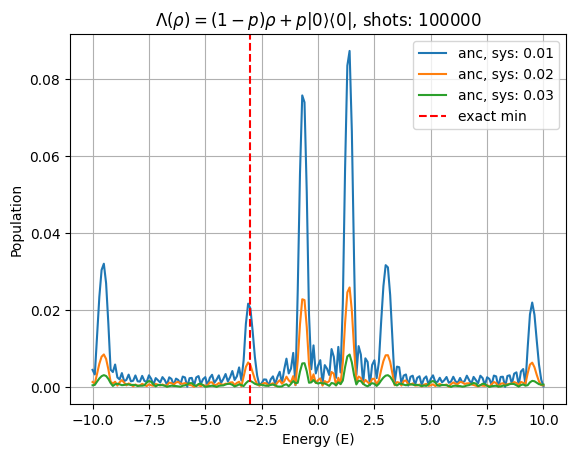

In [33]:
%matplotlib inline
noises = [0.01, 0.02, 0.03]
shots = 10**5
results = []
plt.clf()
for noise in noises:
    
    simulation = Cooling(gamm = 0.0063,
               delt= 0.5,
               Nran=20,
               Ntro=20,
               noise_anc=noise,
               noise_sys= noise,
               shots=shots
               )
    
    E =  simulation[0]
    P = simulation[1]

    results.append(
        [noise, E, P]
    )

    
    plt.plot(E, P, label = f"anc, sys: {noise}")


plt.axvline(x=ground_state_energy, color='red', linestyle='--', label = "exact min")

plt.xlabel('Energy (E)')
plt.ylabel('Population')
plt.title(r'$\Lambda(\rho) = (1-p)\rho + p |0\rangle\langle 0|$, shots: {}'.format(shots))
plt.legend()
plt.grid(True)

plt.show()